500×500 Array{Float64,2}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  1.0
 0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  …  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0     0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.

8

  Iters               objv        objv-change | affected 
-------------------------------------------------------------
      0       2.024318e+00
      1       1.717715e+00      -3.066031e-01 |        2
      2       1.687003e+00      -3.071153e-02 |        2
      3       1.684706e+00      -2.296998e-03 |        2
      4       1.684677e+00      -2.916120e-05 |        0
      5       1.684677e+00       0.000000e+00 |        0
K-means converged with 5 iterations (objv = 1.6846773195194962)


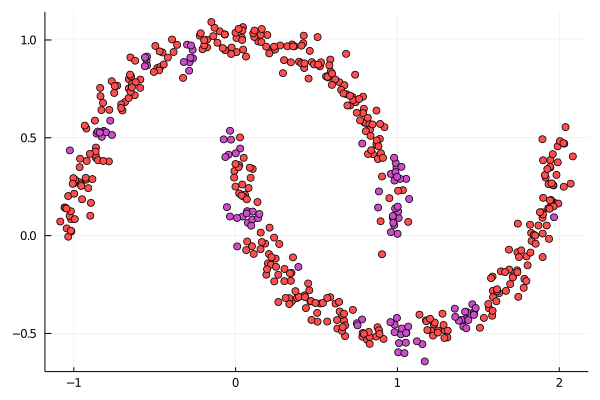

In [8]:
using CSV
using LinearAlgebra
using Clustering
using NBInclude
using Plots
@nbinclude("functions.ipynb")

circleData = CSV.File("moons.csv")
similarityMatrix = generateSimilarityMatrixMoons(circleData, 500)
adjacencyMatrix = generateAdjacencyMatrix(circleData, similarityMatrix, 500)
degreeMatrix = generateDegreeMatrix(adjacencyMatrix, 500)
laplacianMatrix = degreeMatrix - adjacencyMatrix
normalizedLaplacianMatrix = generateNormalizedLaplacianMatrix(degreeMatrix, adjacencyMatrix, 500)
k = calculateK(laplacianMatrix)
k = 2
eigvecLaplacian = eigvecs(laplacianMatrix)
kEigvecLaplacian = getFirstKEigvecs(eigvecLaplacian, 500, k)




X = transpose(kEigvecLaplacian)
R = kmeans(X, k; maxiter=300, display=:iter)

# plot with the point color mapped to the assigned cluster index
scatter(circleData.x, circleData.y, marker_z=R.assignments,
        color=:lightrainbow, legend=false)